## Libraries

- BeautifulSoup

Extracts data from HTML and XML documents. Detects encoding and handles HTML documents with special characters. We can navigate a parsed document and find what we need which makes it quick and painless to extract the data from the webpages. In this course, we will learn how to build web scrapers using Beautiful Soup in detail.

- Scrapy

Python framework for large scale web scraping. It gives you all the tools you need to efficiently extract data from wewbsites, process them as you want, and store them in your preferred structure and format.

- Selenium

Tool for automatingg rowsers. It's primarily used for testing in the industry but is also very handy for web scraping.

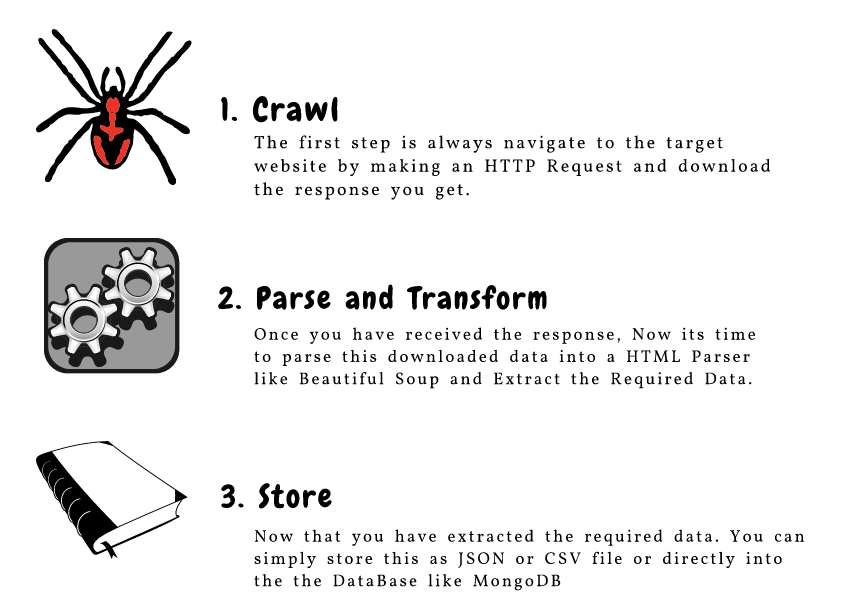

Always follow the robots.txt file of the target website which is also known as the robot exclusion protocol. This tells web robots which pages not to crawl. Indica a los robots de búsquedas a qué páginas del sitio no pueden entrar. Ejemplo https://www.goibibo.com/robots.txt

Most websites don’t need a robots.txt file. That’s because Google can usually find and index all of the important pages on your site.

And they’ll automatically NOT index pages that aren’t important or duplicate versions of other pages. That said, there are 3 main reasons that you’d want to use a robots.txt file.

**Block Non-Public Pages, Maximize Crawl Budget and prevent indexing of resources.**

https://backlinko.com/hub/seo/robots-txt

*1) Crawl* : "Getting" into the web site we will scrap. We're looking for an OK response.

Navigate to the target website and download the source code of the web page. We use **request** library to do this.

In [1]:
# Importing libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd 

In [2]:
# target url to scrap

url = 'https://www.goibibo.com/hotels/hotels-in-shimla-ct/'

- Header

Well, when you’re sending a request to a server you’re not just saying: ‘Hey, give me that info, please’. You are also providing information about the request itself – information, such as the encoding and language of the expected response, the length and type of data provided, who is making the request and so on. These pieces of information, referred to as headers, are intended to make communications on the web easier and more reliable, as the server has a better idea of how to respond.

**User - agent string of chrome: Google search**

In [3]:
headers = {
    'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
    }

In [4]:
# Send request to download the data

req = requests.get(url, headers = headers) # Get is used for viewing without changing
req

<Response [200]>

Response 200: OK

In [5]:
# parse the downloaded data. Try different parsers!

#soup = BeautifulSoup(req.content, 'html.parser')
soup = BeautifulSoup(req.content, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <script>
   var starttime = new Date();
  </script>
  <title data-react-helmet="true">
   Hotels in Shimla Book from 534 hotels
  </title>
  <meta content="#2d67b2" data-react-helmet="true" name="theme-color"/>
  <meta content="122023101161980" data-react-helmet="true" property="fb:app_id"/>
  <meta content="239522418693" data-react-helmet="true" property="fb:pages"/>
  <meta content="l3rQIge7B2N_G1cQl0VZP0y7-nE" data-react-helmet="true" name="alexaVerifyID"/>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width,initial-scale=1.0, maximum-scale=1.0, user-scalable=0" data-react-helmet="true" name="viewport"/>
  <meta content="Book Hotels in Shimla at lowest Prices on Goibibo. Get Free Cancellation and Instant Refund on 534  Shimla Hotels starting from  ₹1040. Book from 47 goSafe Hotels in Shimla, ensuring clean and safe hotel stay in current Coronavirus scenario. Use code GETSETGO for discounts upto 30% off on 

*2) Pass data to HTML Parser with particular objects*

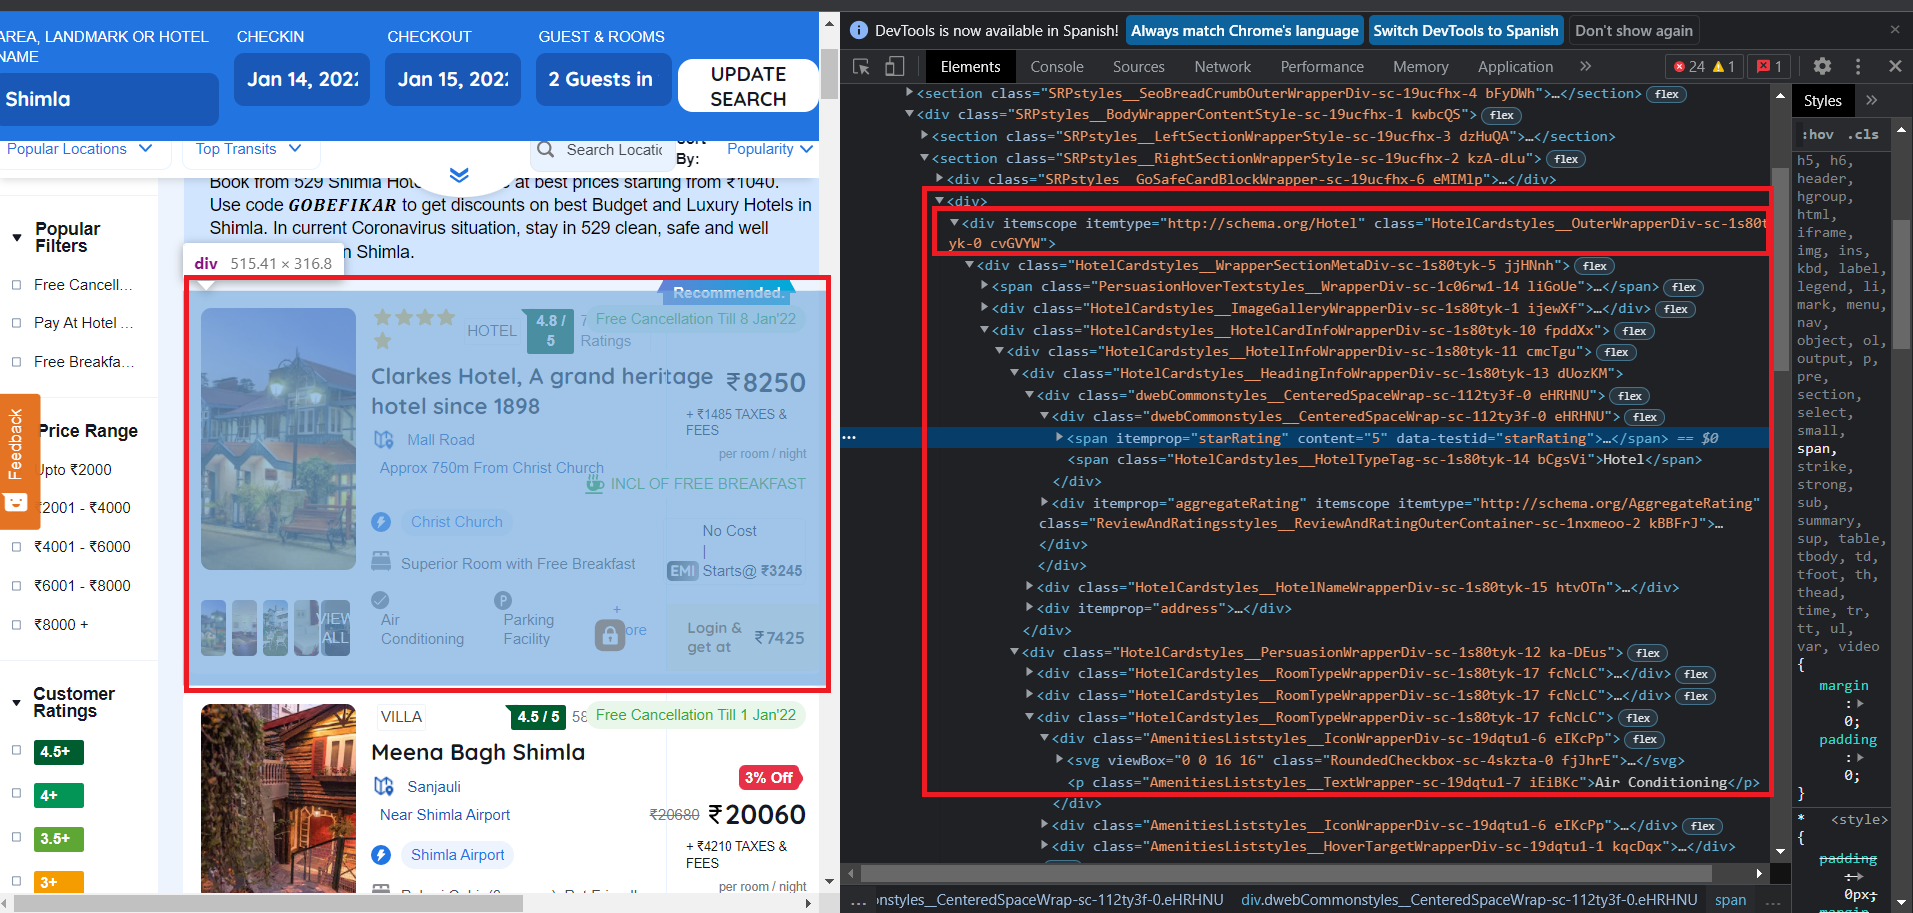

In [6]:
#Getting only the title

title = soup.title.text # Only the first title element
print(title)

div = soup.div.text # Only the first div element
print(div)

Hotels in Shimla Book from 534 hotels
Please click here if you are not redirected within a few seconds.


In [7]:
#Getting one card
hotel_card = soup.find('div', class_='HotelCardstyles__OuterWrapperDiv-sc-1s80tyk-0 cvGVYW') # Inspect the web page to see the class
print (hotel_card.prettify())

<div class="HotelCardstyles__OuterWrapperDiv-sc-1s80tyk-0 cvGVYW" itemscope="" itemtype="http://schema.org/Hotel">
 <div class="HotelCardstyles__WrapperSectionMetaDiv-sc-1s80tyk-5 jjHNnh">
  <div class="HotelCardstyles__ImageGalleryWrapperDiv-sc-1s80tyk-1 ijewXf">
   <meta content="https://cdn1.goibibo.com/voy_mmt/t_g/htl-imgs/202111122316161206-fe737d1c5cef11ec95420a58a9feac02.jpg" itemprop="image"/>
   <div class="HotelCardImageGallerystyles__ImageStyleBasic-sc-r3dzqu-2 gvrvfH" src="https://cdn1.goibibo.com/voy_mmt/t_g/htl-imgs/202111122316161206-fe737d1c5cef11ec95420a58a9feac02.jpg">
   </div>
   <ul class="HotelCardImageGallerystyles__ImageList-sc-r3dzqu-5 kotvfu">
    <li>
     <script pagespeed_no_defer="">
      //<![CDATA[
(function(){var g=encodeURIComponent,h=window,k=document,l="width",m="documentElement",n="height",p="length",q=this,r=function(b,d){var a=b.split("."),c=q;a[0]in c||!c.execScript||c.execScript("var "+a[0]);for(var e;a[p]&&(e=a.shift());)a[p]||void 0===d?c[e]?

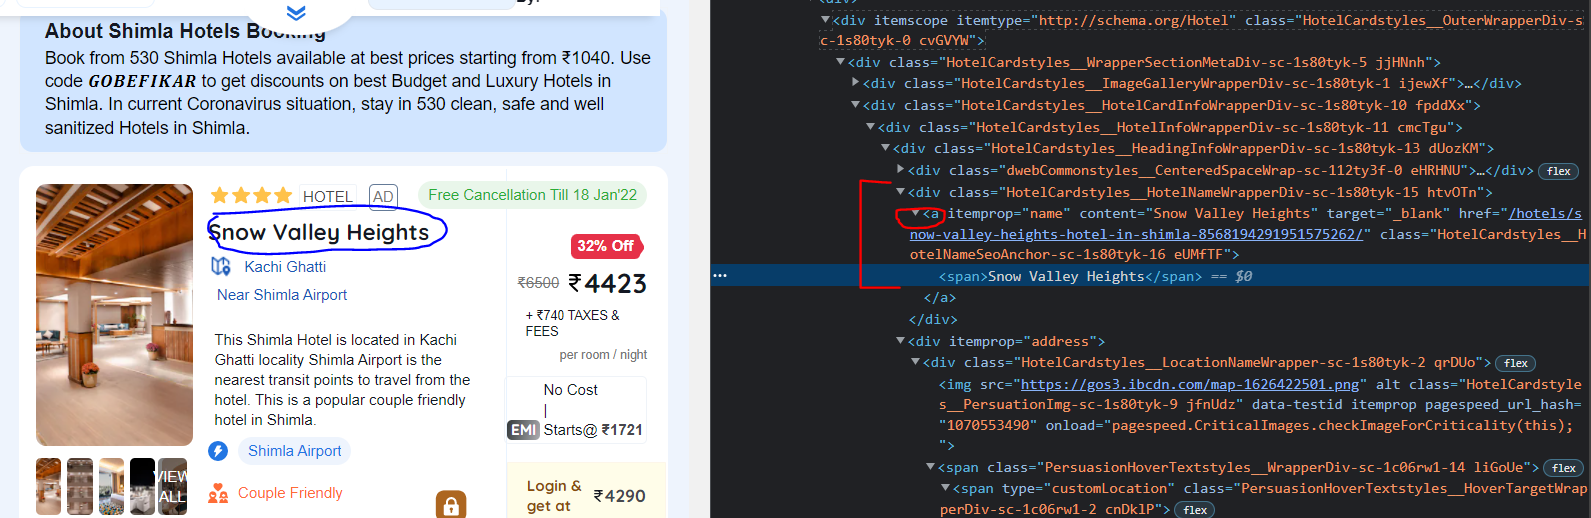

In the card, I search for the html type that allows us to get the title

In [8]:
#Getting the card title

title = hotel_card.a.text # I can do this beacause it is in the same class that the 'hotel_card'. The title is te a element within that class
print (title)

Snow Valley Heights


## Always look for the class right above the element to search

In [9]:
#Getting the card price

first_hotel_card_price = soup.find('div', class_='HotelCardstyles__CurrentPriceTextWrapper-sc-1s80tyk-30 daRNvo') # The price is in another card within the first card!
price = first_hotel_card_price.p.text # the price is the p element within that class
print(price)

4423


In [10]:
#find all the section with specified class (check in the source code if all the other elements are the same)

Needed_data = soup.find_all('div', attrs = {'class', 'HotelCardstyles__HotelNameWrapperDiv-sc-1s80tyk-15 htvOTn'})

In [11]:
# total number of elements
print('Total number of elements found : ', len(Needed_data))

Total number of elements found :  30


In [12]:
# Source code of elements
for element in Needed_data:
    print(str(element) + 5*'------------------------------------------------------------')

<div class="HotelCardstyles__HotelNameWrapperDiv-sc-1s80tyk-15 htvOTn"><a class="HotelCardstyles__HotelNameSeoAnchor-sc-1s80tyk-16 eUMfTF" content="Snow Valley Heights" href="/hotels/snow-valley-heights-hotel-in-shimla-8568194291951575262/" itemprop="name" target="_blank"><span>Snow Valley Heights</span></a></div>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<div class="HotelCardstyles__HotelNameWrapperDiv-sc-1s80tyk-15 htvOTn"><a class="HotelCardstyles__HotelNameSeoAnchor-sc-1s80tyk-16 eUMfTF" content="Clarkes Hotel, A grand heritage hotel since 1898" href="/hotels/clarkes-a-grand-heritage-since-1898-hotel-in-shimla-6919002552374671737/" itemprop="name" target="_blank"><span>Clarkes Hotel, A grand heritage hotel since 1898</span></a><

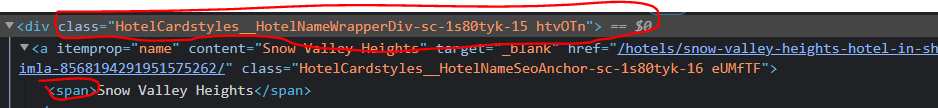

In [27]:
# Selecting only hotel names
scrapped_names = []

for card in Needed_data:
    
    # Get hotel name
    names = {}
    hotel_name = card.find('span')
    
    names['names']=hotel_name.text
    
    print(hotel_name.text)
    scrapped_names.append(names)
    
Names_DF = pd.DataFrame.from_dict(scrapped_names)

Snow Valley Heights
Clarkes Hotel, A grand heritage hotel since 1898
Meena Bagh Shimla
The Zion Hotel
The Oberoi Cecil
Snow Valley Resorts
Jakhu vibes, shimla
Summit Le Royale
The Rock Castle
Zostel Homes Mashobra (Shimla)
Rocky Knob (Explore World Art in One Property)
Marigold Sarovar Portico, Shimla
Royale Retreat
landmark shimla - With Elevator Access To Mall Road
Torrentium Lodge
The Captain B&B
Snow Lotus
Kamna Hill Resort
WoodVista Cottages
The Manor Service Apartments
Belvilla Serene Mountain Getaway with Exquisite Views
Kalawati Homes Vacation Rentals
Royal Tulip Shimla, Kufri
Green Caravan Camps
Hotel Willow Banks
Hotel Sangeet
Goldenfern Resort Shimla
Kufri Pacific Resort
Hotel Dhroov
The Cedar Grand Hotel and Spa


In [28]:
Names_DF

,names
0,Snow Valley Heights
1,"Clarkes Hotel, A grand heritage hotel since 1898"
2,Meena Bagh Shimla
3,The Zion Hotel
4,The Oberoi Cecil
5,Snow Valley Resorts
6,"Jakhu vibes, shimla"
7,Summit Le Royale
8,The Rock Castle
9,Zostel Homes Mashobra (Shimla)


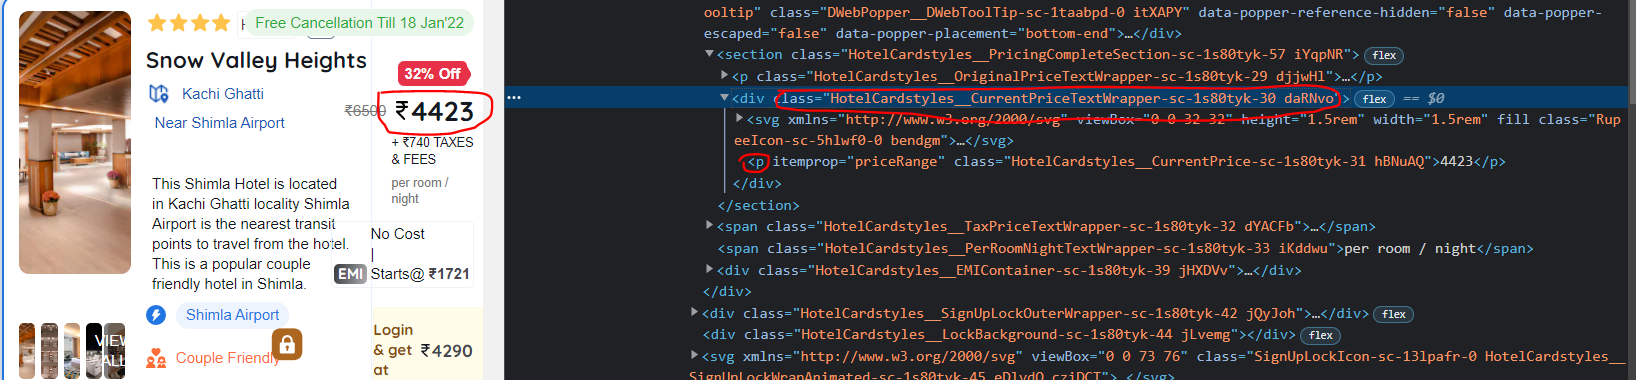

In [29]:
# Selecting only price

Needed_data2 = soup.find_all('div', attrs = {'class', 'HotelCardstyles__CurrentPriceTextWrapper-sc-1s80tyk-30 daRNvo'})
for card in Needed_data2:
    
    # Get price
    price = card.find('p')
    
    print(price.text)

4423
8750
3095
3922
12000
4725
2233
2841
3467
3561
3758
5406
5422
4500
2425
869
2485
3688
10018
7509
7042
9000
6583
2133
7452
1920
4410
4190
4706
7270


In [32]:
# Selecting only price
scrapped_prices = []

for card in Needed_data2:
    
    # Get hotel name
    prices = {}
    price = card.find('p')
    
    prices['price'] = price.text
    
    scrapped_prices.append(prices)
    
Prices_DF = pd.DataFrame.from_dict(scrapped_prices)
Prices_DF

,price
0,4423
1,8750
2,3095
3,3922
4,12000
5,4725
6,2233
7,2841
8,3467
9,3561


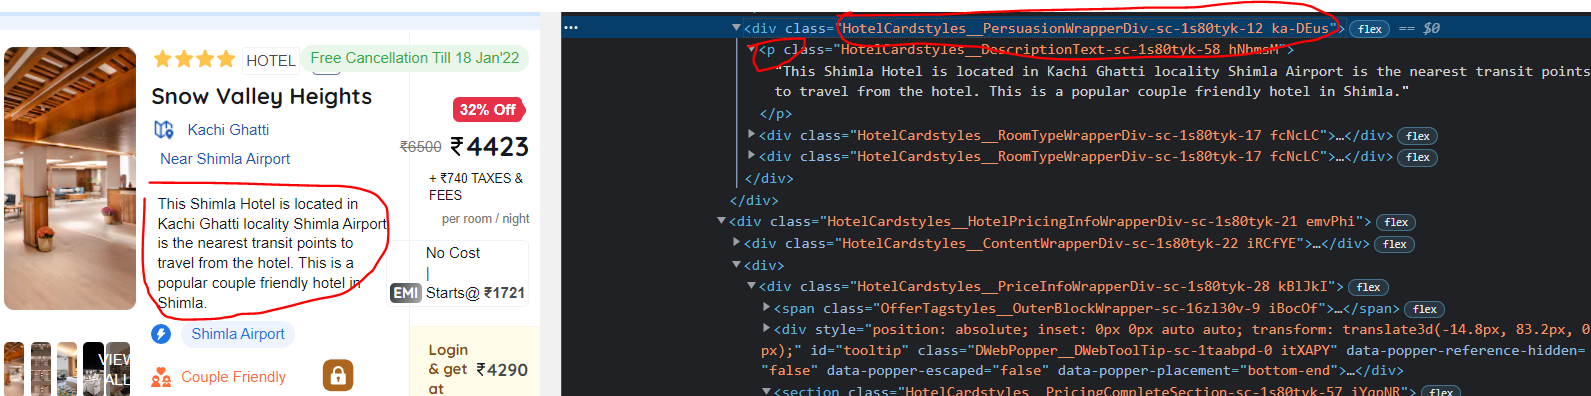

In [36]:
# Selecting only description
scrapped_descriptions = []

for card in Needed_data3:
    
    # Get hotel name
    descriptions = {}
    description = card.find('p')
    
    descriptions['description'] = description.text
    
    scrapped_descriptions.append(descriptions)
    
Descriptions_DF = pd.DataFrame.from_dict(scrapped_descriptions)
Descriptions_DF

,description
0,This Shimla Hotel is located in Kachi Ghatti l...
1,"Set in Shimla, this 5 star accommodation is on..."
2,This Shimla Villa is located in Sanjauli local...
3,"Set in Shimla, this 4 star accommodation is on..."
4,This Shimla Hotel is located in Nabha locality...
5,"Set in Shimla, this 4 star accommodation is on..."
6,This Shimla Homestay is located in Navbhahar l...
7,"Set in Shimla, this 3 star accommodation is on..."
8,This Shimla Hotel is located in Kachi Ghatti l...
9,"Set in Shimla, this accommodation is one of th..."


# Joining DF

In [55]:
names_price = pd.concat([Names_DF, Prices_DF], axis = 1)
All = pd.concat([names_price, Descriptions_DF ], axis = 1)
All.to_csv('hotels_data.csv', index = False)

# Scrapy